#**Ministerio de Tecnologías de la Información y Comunicaciones de Colombia**

**Integrantes:**

* Owen de Jesus Tovar Puello (owentovar07@gmail.com)

* Alfredo Jose Lozada Fuentes (alfredo.lozada@udea.edu.co)

* Rafael Enrique Bustamante Lara (raenbula@yahoo.com)

* Leonidas Enrique Llorente Lopez (leonidasllorente@gmail.com)

* Kaleth Maza Barrios (kalethmb@gmail.com)

**Supuestos:**


**1.**   Colombia es un país de suramérica que agrupa 32 departamentos y un distrito capital.

**2.**   El conjunto de datos de trabajo se obtuvo de Ministerio de Transporte de Colombia a través de la platafor Datos Abiertos. Cuenta con aproximadamente 57 mil registros con 22 columnas. Los datos con los que cuenta el conjunto de datos es hasta el año 2022.

**Fuente:**
https://www.datos.gov.co/Transporte/Numero-de-Veh-culos-El-ctricos-Hibridos/7qfh-tkr3/about_data

**3.** Se seleccionan las carácterísticas ``'CAMIONETA'`` y ``'AUTOMOVIL'`` para la etiqueta "CLASE" debido a que son los datos más abundantes en el dataset y presentan mayor uniformidad respecto a la cantidad de datos.

**4.** El modelo cuenta con una serie de suposiciones con el fin de simplificar el problema. Por ejemplo, se asume que cada vehículo eléctrico (híbrido o eléctrico) cuenta con dos **(2)** baterías: Una **(1)** Principal y otra **(1)** Auxiliar.

El presente estudio se enfoca en la batería principal de los vehículos eléctricos dado que contiene litio, y se omite la batería auxiliar que contiene plomo dado que estas cuentan con un Programa Posconsumo definido.

**5.** Dado que los tipos de servicios contemplados en la data para cada vehículo puede ser ``'Oficial'``, ``'Particular'``, o ``'Público'``, se asume que los vehículos de uso ``'Oficial'`` son de uso ``'Particular``'. Es una simplificación.
Es otras palabras:
``'Oficial'`` = ``'Particular'``

**6.** Los vehículos eléctricos (VE) pueden ser eléctricos (completamente eléctrico) e híbridos. En particular, los vehículos eléctricos híbridos funcionan con energía eléctrica y algún tipo de combustible fósil que puede ser gasolina o diesel. Para efectos de simplificar en el caso de los vehículos eléctricos el tipo de combustible empleado, se asume que:

``'HIBRIDO'`` = ``'GASO ELEC'`` o ``'DIES ELEC'``

**7.** Con el objetivo de simplificar acerca de la durabilidad de una batería de un vehículo eléctrico (VE) (vida útil de la batería), se asume que esta depende del tipo de uso ``'SERVICIO'`` y el tipo de combustible empleado ``'COMBUSTIBLE'``, de la siguiente manera:

* **Durabilidad de la batería** entre **5 y 6 años**, sí:
  
  **Uso:** Público

  **Tipo de combustible:** Eléctrico


* **Durabilidad de la batería** entre **5 y 6 años**, sí:

  **Uso:** Público

  **Tipo de combustible:** Híbrido

* **Durabilidad de la batería** entre **8 y 10 años**, sí:
  
  **Uso:** Particular

  **Tipo de combustible:** Eléctrico

* **Durabilidad de la batería** entre **7 y 8 años**, sí:
  
  **Uso:** Particular
  
  **Tipo de combustible:** Híbrido

Para ello, se emplea una funcion aleatoria que escoge el año de un intervalo.

##**Paso 1: Análisis Exploratorio de Datos (ETL)**


 ## **Cargue de Librerias:**

In [ ]:
# Manipulacion de datos
import pandas as pd

# Procesamiento numérico
import numpy as np

# Visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Trabajar con datos faltantes
import missingno as msno

# Dividir datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Modelos que se van a probar
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb #este es para la prediccion de desecho por vehiculo hasta 2040
from prophet import Prophet # intento de implementar series temporales

# Obtener metricas de evaluacion de los modelos que probemos
from sklearn.metrics import r2_score, mean_absolute_error

# Guardar modelos
import joblib

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## **Manejo de rutas de data de entrada:**


In [ ]:
filename1 = '/content/Numero_de_Vehiculos_Electricos_Hibridos_2024_04_20.csv'

## **Lectura de los datos**

In [ ]:
# Carga del conjunto de datos de trabajo: 'Numero_de_Vehiculos_Electricos_Hibridos_2024_04_20.csv'

df1 = pd.read_csv(filename1)

In [ ]:
df1

,COMBUSTIBLE,ESTADO,MODELO,FECHA_REGISTRO,AÑO_REGISTRO,CLASIFICACION,CLASE,SERVICIO,MARCA,LINEA,...,MODALIDAD,ORGANISMO_TRANSITO,MUNICIPIO,DEPARTAMENTO,CAPACIDAD_CARGA,CAPACIDAD_PASAJEROS,PESO,POTENCIA,EJES,CANTIDAD
0,ELECTRICO,ACTIVO,2022,06/30/2022 12:00:00 AM,2022,AUTOMOVIL,BUS,Público,BYD,BC11S01,...,PASAJEROS,SDM - BOGOTA D.C.,BOGOTA,Bogota D.C.,NaN,49.0,20000.0,402.0,2.0,1
1,ELECTRICO,ACTIVO,2023,10/21/2022 12:00:00 AM,2022,AUTOMOVIL,CAMIONETA,Particular,BYD,YUAN PRO EV,...,NaN,INSTITUTO DE MOVILIDAD DE PEREIRA,PEREIRA,Risaralda,NaN,NaN,1980.0,134.0,2.0,1
2,ELECTRICO,ACTIVO,2014,09/28/2015 12:00:00 AM,2015,MOTO,MOTOCICLETA,Particular,E-MOTORI,VITA,...,NaN,STRIA TTOyTTE MCPAL FLORENCIA,FLORENCIA,Caqueta,NaN,NaN,NaN,NaN,NaN,1
3,ELECTRICO,ACTIVO,2021,08/10/2022 12:00:00 AM,2022,AUTOMOVIL,CAMIONETA,Público,DONGFENG,DFA5030XXYABEV7,...,CARGA,STRIA TTOyTTE MCPAL FUNZA,FUNZA,Cundinamarca,845.0,NaN,2550.0,80.0,NaN,1
4,ELECTRICO,ACTIVO,2022,10/25/2021 12:00:00 AM,2021,AUTOMOVIL,CAMIONETA,Particular,BYD,SONG PRO EV,...,NaN,STRIA TTEyMOV CUND/EL ROSAL,EL ROSAL,Cundinamarca,NaN,NaN,2120.0,161.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56540,GASO ELEC,ACTIVO,2023,10/06/2022 12:00:00 AM,2022,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,...,PASAJEROS,STRIA DE TTOyTTE MEDELLIN,MEDELLIN,Antioquia,NaN,NaN,1931.0,153.0,2.0,1
56541,GASO ELEC,ACTIVO,2023,10/07/2022 12:00:00 AM,2022,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,...,NaN,SECRETARIA DE MOVILIDAD MUNICIPAL DE CHIA,CHIA,Cundinamarca,NaN,NaN,1931.0,153.0,2.0,1
56542,GASO ELEC,ACTIVO,2023,10/12/2022 12:00:00 AM,2022,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,...,NaN,STRIA TTOyTTE MCPAL POPAYAN,POPAYAN,Cauca,NaN,NaN,1931.0,153.0,2.0,1
56543,GASO ELEC,ACTIVO,2023,09/30/2022 12:00:00 AM,2022,AUTOMOVIL,CAMIONETA,Particular,MAZDA,CX-30,...,PASAJEROS,SDM - BOGOTA D.C.,BOGOTA,Bogota D.C.,NaN,NaN,1931.0,153.0,2.0,1


In [ ]:
# Se muestra información general de los datos contenidos en el dataset:

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56545 entries, 0 to 56544
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COMBUSTIBLE          56545 non-null  object 
 1   ESTADO               56545 non-null  object 
 2   MODELO               56545 non-null  int64  
 3   FECHA_REGISTRO       56545 non-null  object 
 4   AÑO_REGISTRO         56545 non-null  int64  
 5   CLASIFICACION        56545 non-null  object 
 6   CLASE                56545 non-null  object 
 7   SERVICIO             56545 non-null  object 
 8   MARCA                56545 non-null  object 
 9   LINEA                56545 non-null  object 
 10  CARROCERIA           56545 non-null  object 
 11  CILINDRAJE           53054 non-null  float64
 12  MODALIDAD            36663 non-null  object 
 13  ORGANISMO_TRANSITO   56545 non-null  object 
 14  MUNICIPIO            56545 non-null  object 
 15  DEPARTAMENTO         56545 non-null 

In [ ]:
# Se cuentan valores únicos de la columna 'DEPARTAMENTO':

frecuencia_depto = df1['DEPARTAMENTO'].value_counts()
frecuencia_depto

,count
DEPARTAMENTO,
Bogota D.C.,25507
Antioquia,14237
Cundinamarca,4688
Valle del Cauca,3222
Norte de Santander,2350
Risaralda,958
Atlantico,846
Caldas,750
Santander,679


In [ ]:
# Se hace el conteo del número de departamentos que cuentan con datos:

len(frecuencia_depto)   # 29 departamentos cuentan con datos en el dataset.

29

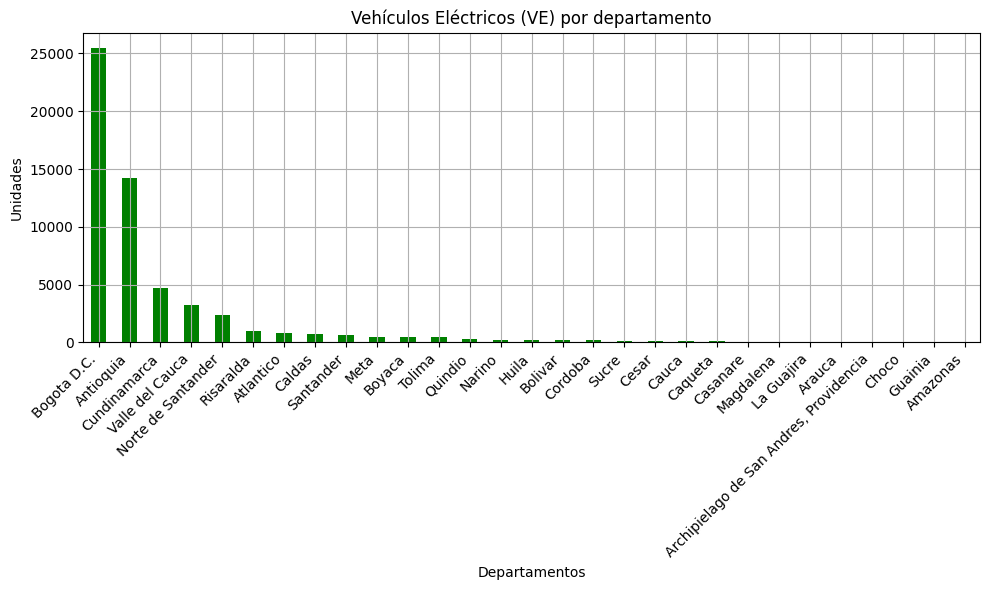

In [ ]:
# Diagrama de barras de "Departamento vs Frecuencia":

plt.figure(figsize=(10, 6))  # Definir el tamaño de la figura (ancho, alto)
frecuencia_depto.plot(kind='bar', color='green')
plt.title('Vehículos Eléctricos (VE) por departamento')
plt.xlabel('Departamentos')
plt.ylabel('Unidades')
plt.grid(True)

# Inclinación de las etiquetas de los departamentos
plt.xticks(rotation=45, ha='right')  # 'ha' controla la alineación horizontal, 'right' las alinea a la derecha

plt.tight_layout()  # Ajusta el diseño para que las etiquetas no se solapen
plt.show()
plt.show()

In [ ]:
# Se identifican los valores únicos de la columna 'CLASIFICACION':

valores_unicos_clasificacion = df1['CLASIFICACION'].unique()
print(valores_unicos_clasificacion)

print("""
La columna 'CLASIFICACION' contiene información acerca de la clasificación del vehículo dependendiendo del número de ruedas con que:

'AUTOMOVIL': Vehículos de cuatro ruedas.
'MOTO': Vehículos de dos ruedas.
'MOTOCARRO': Vehículos de tres ruedas.
""")

['AUTOMOVIL' 'MOTO' 'MOTOCARRO']

La columna 'CLASIFICACION' contiene información acerca de la clasificación del vehículo dependendiendo del número de ruedas con que:

'AUTOMOVIL': Vehículos de cuatro ruedas.
'MOTO': Vehículos de dos ruedas.
'MOTOCARRO': Vehículos de tres ruedas.



In [ ]:
# Se cuentan valores de la columna "CLASIFICACION": El tipo de dato más abundante es el clasificado como 'AUTOMOVIL'

frecuencia_clasificacion = df1['CLASIFICACION'].value_counts()
frecuencia_clasificacion

,count
CLASIFICACION,
AUTOMOVIL,54682
MOTO,1623
MOTOCARRO,240


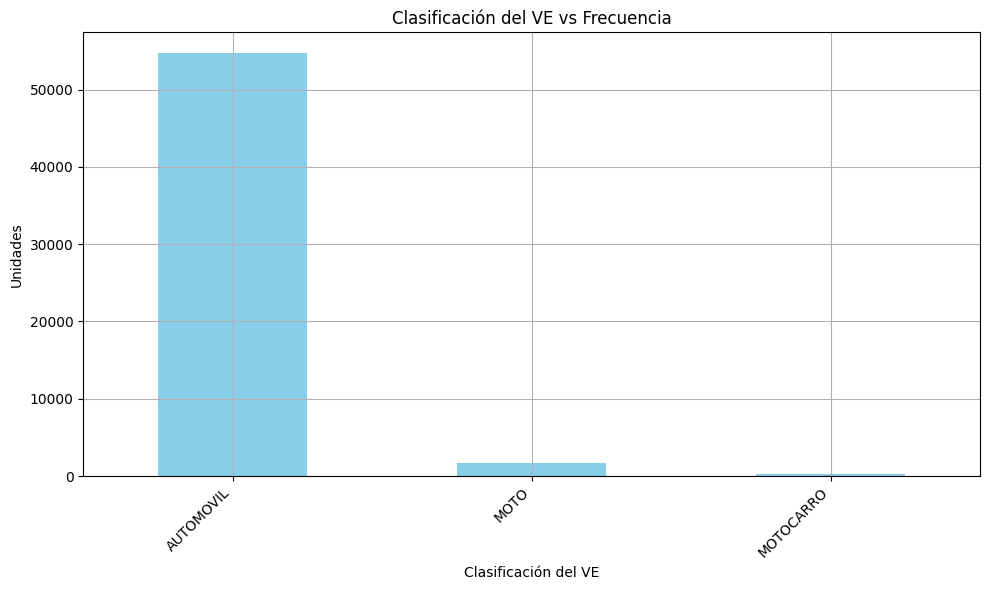

In [ ]:
# Diagrama de barras de "Clasificación del VE vs Frecuencia":

plt.figure(figsize=(10, 6))  # Definir el tamaño de la figura (ancho, alto)
frecuencia_clasificacion.plot(kind='bar', color='skyblue')
plt.title('Clasificación del VE vs Frecuencia')
plt.xlabel('Clasificación del VE')
plt.ylabel('Unidades')
plt.grid(True)

# Inclinación de las etiquetas de los departamentos
plt.xticks(rotation=45, ha='right')  # 'ha' controla la alineación horizontal, 'right' las alinea a la derecha

plt.tight_layout()  # Ajusta el diseño para que las etiquetas no se solapen
plt.show()

In [ ]:
# Se identifican los valores únicos de la columna 'AÑO_REGISTRO':

valores_unicos_anio_registro = df1['AÑO_REGISTRO'].unique()
print(sorted(valores_unicos_anio_registro))

# Número de años con los que se cuenta registro:

print(f"\nSe cuenta con {len(df1)} datos recopilados en {len(valores_unicos_anio_registro)} años.")

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

Se cuenta con 56545 datos recopilados en 13 años.


In [ ]:
# Se identifican los valores únicos de la columna 'CLASE':

valores_unicos_clase = df1['CLASE'].unique()

# Crea un DataFrame para mostrarlo como tabla:
df_clase = pd.DataFrame(valores_unicos_clase, columns=['CLASE'])

# Muestra la tabla de manera agradable:
print(df_clase.to_string(index=False))

       CLASE
         BUS
   CAMIONETA
 MOTOCICLETA
   AUTOMOVIL
MOTOTRICICLO
   MOTOCARRO
 CUADRICICLO
      CAMION
   TRICIMOTO
    MICROBUS
  CUATRIMOTO
TRACTOCAMION
     CAMPERO


In [ ]:
# Se cuentan valores de la columna "CLASE": La clase de vehículo más abundante y uniforme en cantidad de datos es 'CAMIONETA' y 'AUTOMOVIL'.

frecuencia_clase = df1['CLASE'].value_counts()
frecuencia_clase

,count
CLASE,
CAMIONETA,29565
AUTOMOVIL,17061
CAMPERO,4541
BUS,1962
MOTOCICLETA,1416
CUADRICICLO,1016
CAMION,530
MOTOCARRO,240
TRICIMOTO,188


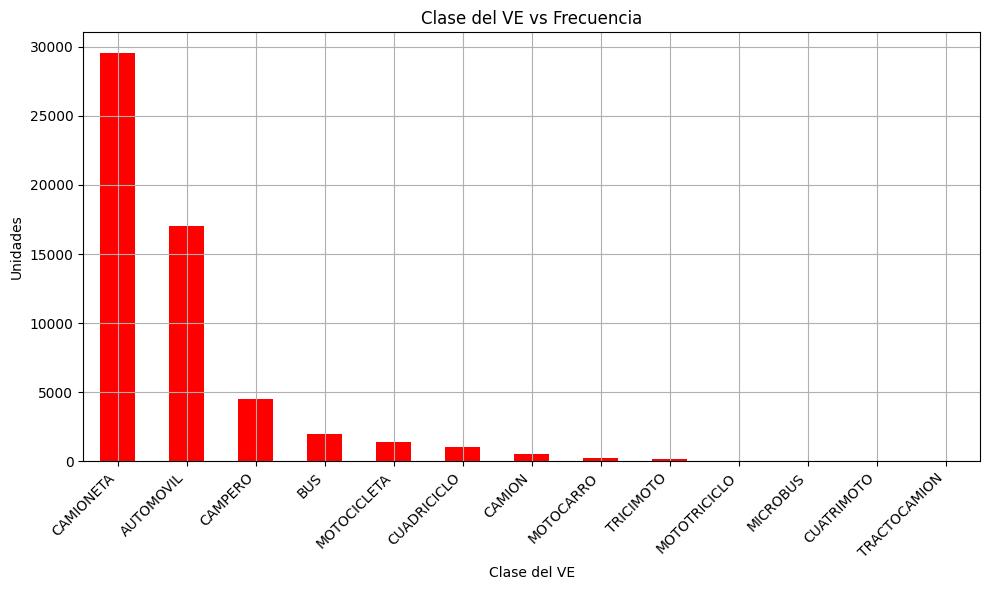

In [ ]:
# Diagrama de barras de "Clase del VE vs Frecuencia":

plt.figure(figsize=(10, 6))  # Definir el tamaño de la figura (ancho, alto)
frecuencia_clase.plot(kind='bar', color='red')
plt.title('Clase del VE vs Frecuencia')
plt.xlabel('Clase del VE')
plt.ylabel('Unidades')
plt.grid(True)

# Inclinación de las etiquetas de los departamentos
plt.xticks(rotation=45, ha='right')  # 'ha' controla la alineación horizontal, 'right' las alinea a la derecha

plt.tight_layout()  # Ajusta el diseño para que las etiquetas no se solapen
plt.show()

## **Ajuste de DataFrame:**

In [ ]:
# Se asume que cada vehículo sin distincion tiene 2 baterías: Una (1) Principal y otra (1) auxiliar. Si es una moto no tiene batería auxiliar:

df1['BATERIA_PRINCIPAL'] = 1
df1['BATERIA_AUXILIAR'] = 0

In [ ]:
# Se adiciona un campo calculado ('TOTAL_BATERIAS') para saber cuántas baterías tiene cada vehículo: 'CAMIONETA' o 'AUTOMOVIL'.

df1['TOTAL_BATERIAS'] = df1['BATERIA_PRINCIPAL'] + df1['BATERIA_AUXILIAR']

In [ ]:
# El tipo de uso de los vehículos incluídos en la data:

valores_unicos_servicio = df1['SERVICIO'].unique()
print(valores_unicos_servicio)

['Público' 'Particular' 'Oficial']


In [ ]:
# El tipo de combustible empleado por cada vehículos:

valores_unicos_combustible = df1['COMBUSTIBLE'].unique()
print(valores_unicos_combustible)

['ELECTRICO' 'GASO ELEC' 'DIES ELEC']


In [ ]:
# Normalización de la data:

# Reemplazar 'Oficial' por 'Particular' en la columna 'SERVICIO': Es una simplificación.
df1['SERVICIO'] = df1['SERVICIO'].replace('Oficial', 'Particular')

# Reemplazar 'GASO ELEC' y 'DIES ELEC' por 'HIBRIDO' en la columna 'COMBUSTIBLE': Es una simplificación.
df1['COMBUSTIBLE'] = df1['COMBUSTIBLE'].replace('GASO ELEC', 'HIBRIDO')
df1['COMBUSTIBLE'] = df1['COMBUSTIBLE'].replace('DIES ELEC', 'HIBRIDO')

In [ ]:
# Definir las condiciones basadas en 'SERVICIO' y 'COMBUSTIBLE':

condiciones = [
    (df1['SERVICIO'] == 'Público') & (df1['COMBUSTIBLE'] == 'ELECTRICO'),
    (df1['SERVICIO'] == 'Público') & (df1['COMBUSTIBLE'] == 'HIBRIDO'),
    (df1['SERVICIO'] == 'Particular') & (df1['COMBUSTIBLE'] == 'ELECTRICO'),
    (df1['SERVICIO'] == 'Particular') & (df1['COMBUSTIBLE'] == 'HIBRIDO')
]

# Definir los valores aleatorios en función de las condiciones:
valores = [
    np.random.uniform(5, 6, size=len(df1)),  # Público, Eléctrico
    np.random.uniform(5, 6, size=len(df1)),  # Público, Híbrido
    np.random.uniform(8, 10, size=len(df1)),  # Particular, Eléctrico
    np.random.uniform(7, 8, size=len(df1))   # Particular, Híbrido
]

# Crear la columna 'DURABILIDAD_BATERIA' usando np.select:
df1['DURABILIDAD_BATERIA'] = np.select(condiciones, valores, default=np.nan)

# Convertir la durabilidad a enteros si lo prefieres
df1['DURABILIDAD_BATERIA'] = df1['DURABILIDAD_BATERIA'].astype(int)


## **Paso 2: Definir un DataFrame de trabajo 'df1'**

Se crea un nuevo DataFrame a partir del Análisis Exploratorio de Datos y los Preprocesamientos anteriores.

El nuevo DataFrame contiene las siguientes columnas:
* 'COMBUSTIBLE'
* 'CLASE'
* 'SERVICIO'
* 'DEPARTAMENTO'
* 'AÑO_REGISTRO'
* 'PESO'
* 'EJES'
* 'TOTAL_BATERIAS'
* 'DURABILIDAD_BATERIA'

In [ ]:
# Creación de un nuevo DataFrame 'df1': se definen la columnas de interés.

df1 = df1[['COMBUSTIBLE','CLASE','SERVICIO','DEPARTAMENTO','AÑO_REGISTRO','PESO','EJES','TOTAL_BATERIAS','DURABILIDAD_BATERIA']]
df1

,COMBUSTIBLE,CLASE,SERVICIO,DEPARTAMENTO,AÑO_REGISTRO,PESO,EJES,TOTAL_BATERIAS,DURABILIDAD_BATERIA
0,ELECTRICO,BUS,Público,Bogota D.C.,2022,20000.0,2.0,1,5
1,ELECTRICO,CAMIONETA,Particular,Risaralda,2022,1980.0,2.0,1,8
2,ELECTRICO,MOTOCICLETA,Particular,Caqueta,2015,NaN,NaN,1,8
3,ELECTRICO,CAMIONETA,Público,Cundinamarca,2022,2550.0,NaN,1,5
4,ELECTRICO,CAMIONETA,Particular,Cundinamarca,2021,2120.0,2.0,1,9
...,...,...,...,...,...,...,...,...,...
56540,HIBRIDO,CAMIONETA,Particular,Antioquia,2022,1931.0,2.0,1,7
56541,HIBRIDO,CAMIONETA,Particular,Cundinamarca,2022,1931.0,2.0,1,7
56542,HIBRIDO,CAMIONETA,Particular,Cauca,2022,1931.0,2.0,1,7
56543,HIBRIDO,CAMIONETA,Particular,Bogota D.C.,2022,1931.0,2.0,1,7


In [ ]:
# Filtrar donde la columna 'CLASE' sea igual a 'CAMIONETA' o 'AUTOMOVIL': El número total de datos de interés es de 46626 registros.

df_filtrado = df1[((df1['CLASE'] == 'CAMIONETA') | (df1['CLASE'] == 'AUTOMOVIL')) &
                  ((df1['SERVICIO'] == 'Particular') | (df1['SERVICIO'] == 'Público'))]

# Ver las primeras filas del dataframe filtrado
df_filtrado

,COMBUSTIBLE,CLASE,SERVICIO,DEPARTAMENTO,AÑO_REGISTRO,PESO,EJES,TOTAL_BATERIAS,DURABILIDAD_BATERIA
1,ELECTRICO,CAMIONETA,Particular,Risaralda,2022,1980.0,2.0,1,8
3,ELECTRICO,CAMIONETA,Público,Cundinamarca,2022,2550.0,NaN,1,5
4,ELECTRICO,CAMIONETA,Particular,Cundinamarca,2021,2120.0,2.0,1,9
5,ELECTRICO,AUTOMOVIL,Particular,Antioquia,2022,1440.0,2.0,1,8
6,ELECTRICO,AUTOMOVIL,Particular,Bogota D.C.,2019,1345.0,2.0,1,9
...,...,...,...,...,...,...,...,...,...
56539,HIBRIDO,CAMIONETA,Particular,Antioquia,2022,1931.0,2.0,1,7
56540,HIBRIDO,CAMIONETA,Particular,Antioquia,2022,1931.0,2.0,1,7
56541,HIBRIDO,CAMIONETA,Particular,Cundinamarca,2022,1931.0,2.0,1,7
56542,HIBRIDO,CAMIONETA,Particular,Cauca,2022,1931.0,2.0,1,7


## **Preprocesamiento a Datos Faltantes**

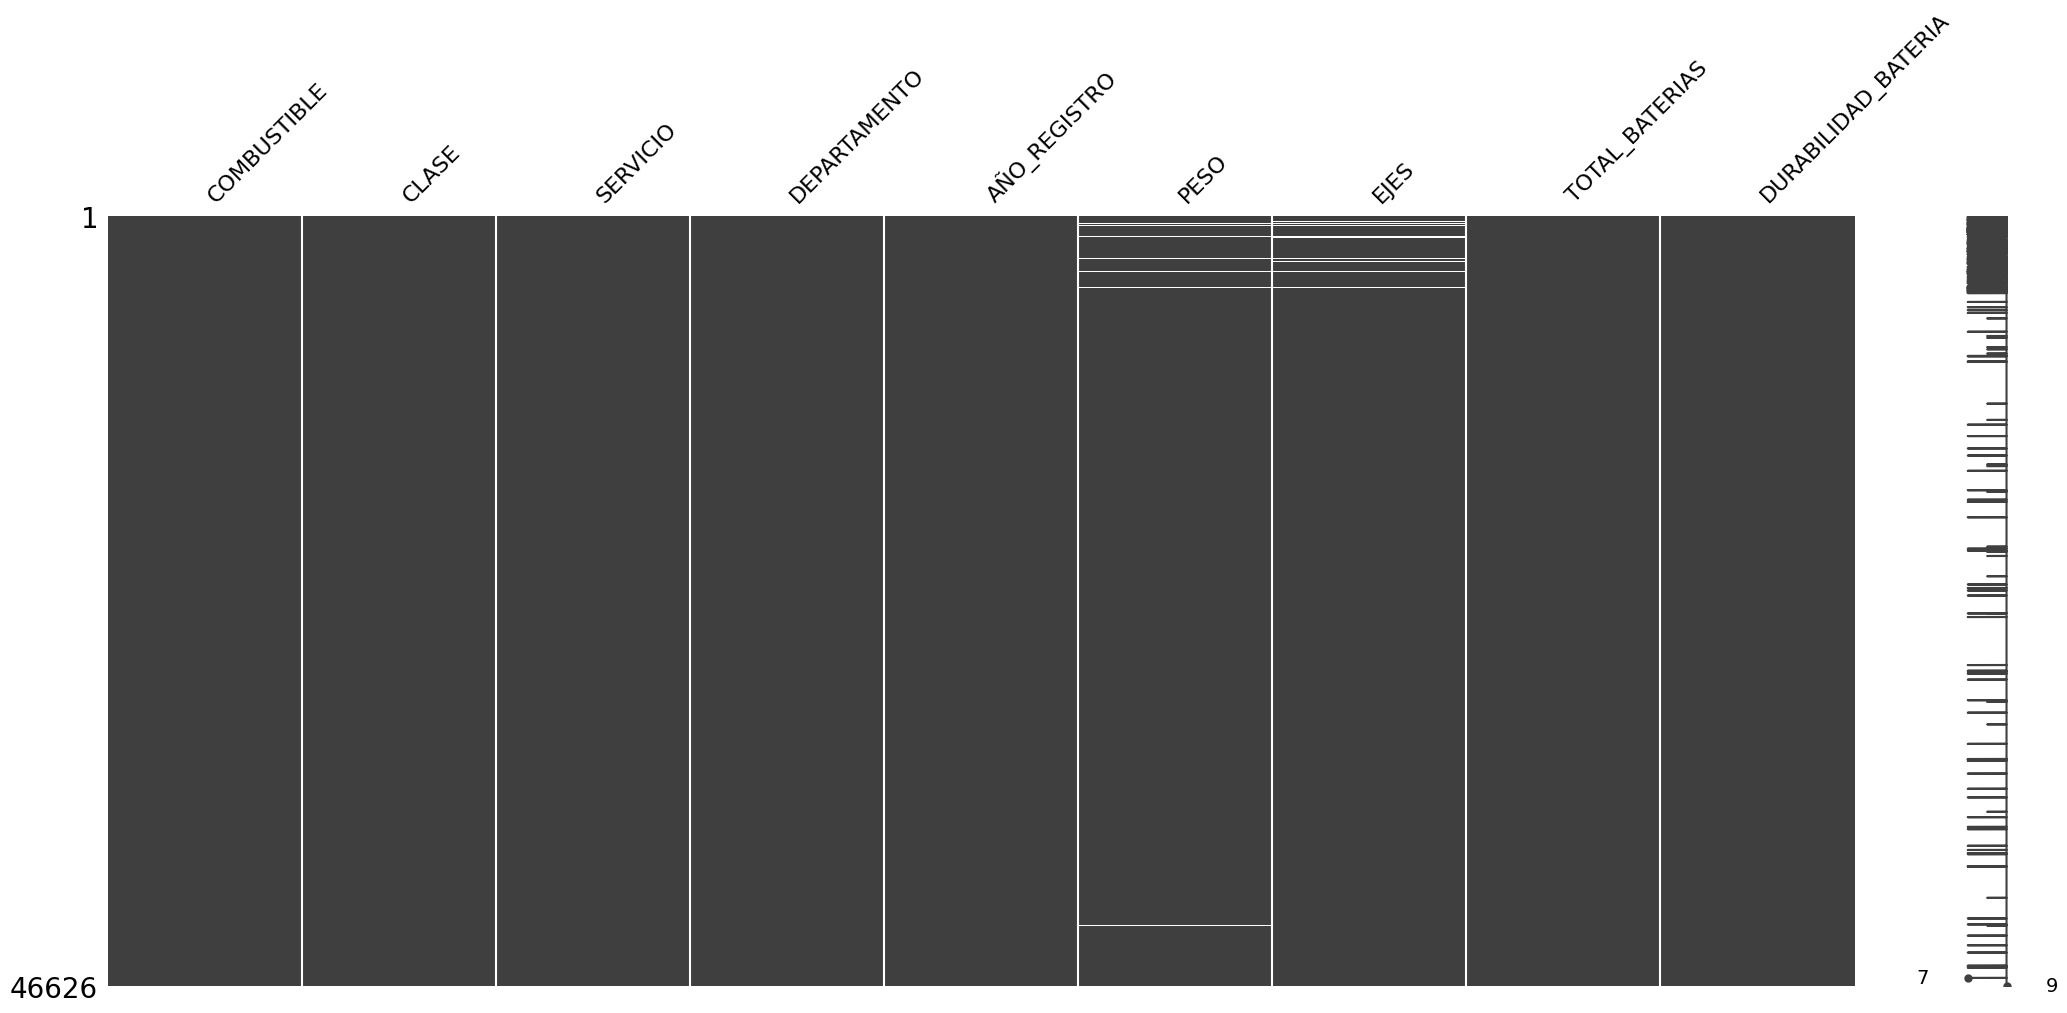

In [ ]:
# Se identifican en datos faltantes en el DataFrame 'df_filtrado':

msno.matrix(df_filtrado)
plt.show()

In [ ]:
# Columnas con Datos Faltantes y cuántos de ellos hay:

df_filtrado.isnull().sum()    # Solo las columnas 'PESO' y 'EJES' tienen datos faltantes

,0
COMBUSTIBLE,0
CLASE,0
SERVICIO,0
DEPARTAMENTO,0
AÑO_REGISTRO,0
PESO,404
EJES,410
TOTAL_BATERIAS,0
DURABILIDAD_BATERIA,0


In [ ]:
# Se eliminan las columnas 'PESO' y 'EJES' con Datos Faltantes del DataFrame:

df_filtrado = df_filtrado.dropna(subset=['PESO', 'EJES'])

In [ ]:
# Verificación de Datos Faltantes en el DataFrame:

df_filtrado.isnull().sum()

,0
COMBUSTIBLE,0
CLASE,0
SERVICIO,0
DEPARTAMENTO,0
AÑO_REGISTRO,0
PESO,0
EJES,0
TOTAL_BATERIAS,0
DURABILIDAD_BATERIA,0


In [ ]:
# Se muestra información general de los datos contenidos en el DataFrame 'df_filtrado':

df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46128 entries, 1 to 56543
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COMBUSTIBLE          46128 non-null  object 
 1   CLASE                46128 non-null  object 
 2   SERVICIO             46128 non-null  object 
 3   DEPARTAMENTO         46128 non-null  object 
 4   AÑO_REGISTRO         46128 non-null  int64  
 5   PESO                 46128 non-null  float64
 6   EJES                 46128 non-null  float64
 7   TOTAL_BATERIAS       46128 non-null  int64  
 8   DURABILIDAD_BATERIA  46128 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 3.5+ MB


In [ ]:
# Categorizar la columna 'COMBUSTIBLE':
df_filtrado['COMBUSTIBLE'] = df_filtrado['COMBUSTIBLE'].map({'HIBRIDO': 0, 'ELECTRICO': 1})

# Categorizar la columna 'CLASE':
df_filtrado['CLASE'] = df_filtrado['CLASE'].map({'CAMIONETA': 0, 'AUTOMOVIL': 1})

# Categorizar la columna 'SERVICIO':
df_filtrado['SERVICIO'] = df_filtrado['SERVICIO'].map({'Particular': 0, 'Público': 1})

# Categorizar la columna 'DEPARTAMENTO' con valores de 0 a n ('factorize' asigna un número a cada valor único):
df_filtrado['DEPARTAMENTO'], _ = pd.factorize(df_filtrado['DEPARTAMENTO'])

# Ver las primeras filas del dataframe para confirmar los cambios
df_filtrado


<ipython-input-139-c71010d063a2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-139-c71010d063a2>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-139-c71010d063a2>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-139-c71

,COMBUSTIBLE,CLASE,SERVICIO,DEPARTAMENTO,AÑO_REGISTRO,PESO,EJES,TOTAL_BATERIAS,DURABILIDAD_BATERIA
1,1,0,0,0,2022,1980.0,2.0,1,8
4,1,0,0,1,2021,2120.0,2.0,1,9
5,1,1,0,2,2022,1440.0,2.0,1,8
6,1,1,0,3,2019,1345.0,2.0,1,9
7,1,1,0,2,2021,1445.0,2.0,1,8
...,...,...,...,...,...,...,...,...,...
56539,0,0,0,2,2022,1931.0,2.0,1,7
56540,0,0,0,2,2022,1931.0,2.0,1,7
56541,0,0,0,1,2022,1931.0,2.0,1,7
56542,0,0,0,11,2022,1931.0,2.0,1,7


In [ ]:
# Se muestra nuevamente la información general de los datos contenidos en el DataFrame 'df_filtrado':

df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46128 entries, 1 to 56543
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COMBUSTIBLE          46128 non-null  int64  
 1   CLASE                46128 non-null  int64  
 2   SERVICIO             46128 non-null  int64  
 3   DEPARTAMENTO         46128 non-null  int64  
 4   AÑO_REGISTRO         46128 non-null  int64  
 5   PESO                 46128 non-null  float64
 6   EJES                 46128 non-null  float64
 7   TOTAL_BATERIAS       46128 non-null  int64  
 8   DURABILIDAD_BATERIA  46128 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.5 MB


In [ ]:
# Revisar la varianza de la columna 'TOTAL_BATERIAS':

print(df_filtrado['TOTAL_BATERIAS'].var())


0.0


In [ ]:
# Se crea una Matrix de Correlación de Pearson:

df_filtrado.corr()

,COMBUSTIBLE,CLASE,SERVICIO,DEPARTAMENTO,AÑO_REGISTRO,PESO,EJES,TOTAL_BATERIAS,DURABILIDAD_BATERIA
COMBUSTIBLE,1.000000,0.158525,0.243851,-0.065369,-0.323591,-0.092735,-0.066037,NaN,0.627577
CLASE,0.158525,1.000000,-0.075080,-0.103516,-0.186108,-0.485537,0.015726,NaN,0.184394
SERVICIO,0.243851,-0.075080,1.000000,-0.053990,-0.171201,0.064294,-0.119514,NaN,-0.530363
DEPARTAMENTO,-0.065369,-0.103516,-0.053990,1.000000,0.063665,-0.006753,0.004090,NaN,-0.014684
AÑO_REGISTRO,-0.323591,-0.186108,-0.171201,0.063665,1.000000,0.100770,0.081170,NaN,-0.133991
PESO,-0.092735,-0.485537,0.064294,-0.006753,0.100770,1.000000,0.030968,NaN,-0.132591
EJES,-0.066037,0.015726,-0.119514,0.004090,0.081170,0.030968,1.000000,NaN,0.045883
TOTAL_BATERIAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DURABILIDAD_BATERIA,0.627577,0.184394,-0.530363,-0.014684,-0.133991,-0.132591,0.045883,NaN,1.000000


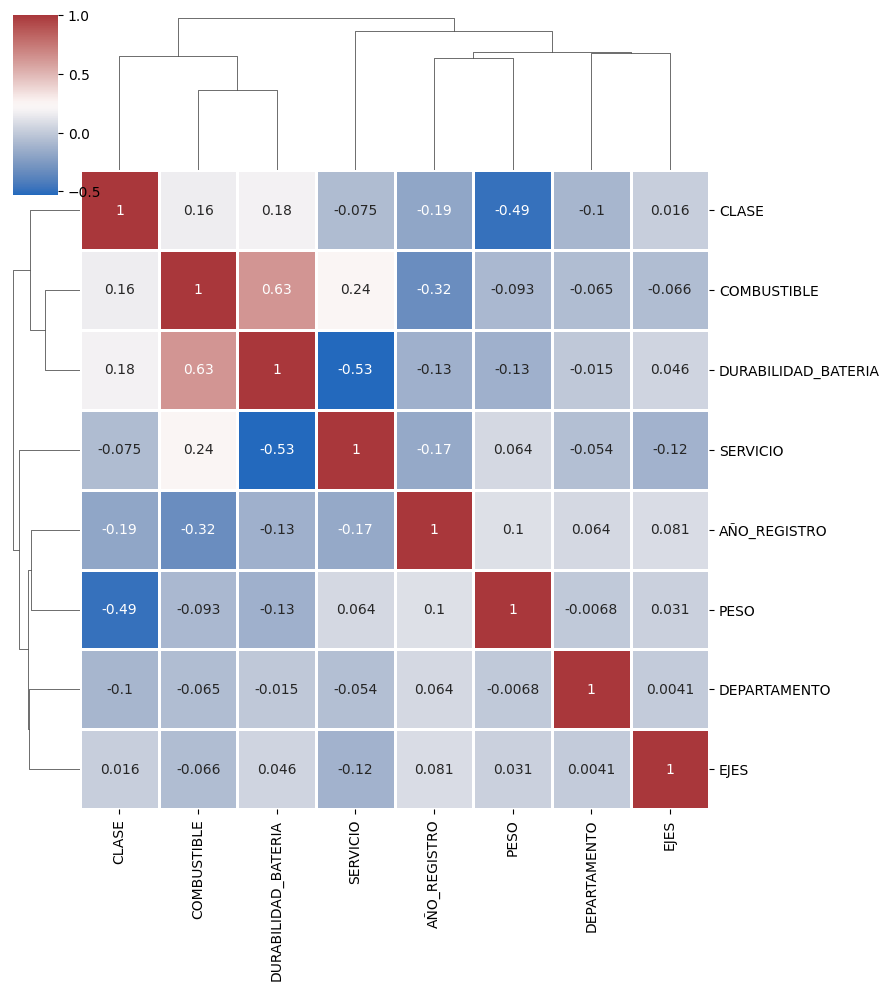

In [ ]:
# Excluir la columna 'TOTAL_BATERIAS' del análisis de correlación:
df_correlacion = df_filtrado.drop(columns=['TOTAL_BATERIAS'])

# Volver a calcular la correlación sin la columna 'TOTAL_BATERIAS':
sns.clustermap(df_correlacion.corr(), cmap="vlag", dendrogram_ratio=(0.1, 0.2), annot=True, linewidths=.9, figsize=(9,10))
plt.show()


In [ ]:
# Calcular el año de reemplazo de las baterías:

df_filtrado['AÑO_REEMPLAZO'] = df_filtrado['AÑO_REGISTRO'] + df_filtrado['DURABILIDAD_BATERIA']

<ipython-input-144-975bd0ae767d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Se muestra el DataFrame 'df_filtrado':

df_filtrado

,COMBUSTIBLE,CLASE,SERVICIO,DEPARTAMENTO,AÑO_REGISTRO,PESO,EJES,TOTAL_BATERIAS,DURABILIDAD_BATERIA,AÑO_REEMPLAZO
1,1,0,0,0,2022,1980.0,2.0,1,8,2030
4,1,0,0,1,2021,2120.0,2.0,1,9,2030
5,1,1,0,2,2022,1440.0,2.0,1,8,2030
6,1,1,0,3,2019,1345.0,2.0,1,9,2028
7,1,1,0,2,2021,1445.0,2.0,1,8,2029
...,...,...,...,...,...,...,...,...,...,...
56539,0,0,0,2,2022,1931.0,2.0,1,7,2029
56540,0,0,0,2,2022,1931.0,2.0,1,7,2029
56541,0,0,0,1,2022,1931.0,2.0,1,7,2029
56542,0,0,0,11,2022,1931.0,2.0,1,7,2029


In [ ]:
# Calcular los cambios proyectados desde AÑO_REGISTRO hasta el año 2039 (2024 + 15):

df_filtrado['CAMBIOS_A_2040'] = (
    (2040 - df_filtrado['AÑO_REGISTRO']) / df_filtrado['DURABILIDAD_BATERIA']
).astype(int)

<ipython-input-146-01491bc1b71f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Verifica los primeros registros para confirmar el cálculo:

df_filtrado

,COMBUSTIBLE,CLASE,SERVICIO,DEPARTAMENTO,AÑO_REGISTRO,PESO,EJES,TOTAL_BATERIAS,DURABILIDAD_BATERIA,AÑO_REEMPLAZO,CAMBIOS_A_2040
1,1,0,0,0,2022,1980.0,2.0,1,8,2030,2
4,1,0,0,1,2021,2120.0,2.0,1,9,2030,2
5,1,1,0,2,2022,1440.0,2.0,1,8,2030,2
6,1,1,0,3,2019,1345.0,2.0,1,9,2028,2
7,1,1,0,2,2021,1445.0,2.0,1,8,2029,2
...,...,...,...,...,...,...,...,...,...,...,...
56539,0,0,0,2,2022,1931.0,2.0,1,7,2029,2
56540,0,0,0,2,2022,1931.0,2.0,1,7,2029,2
56541,0,0,0,1,2022,1931.0,2.0,1,7,2029,2
56542,0,0,0,11,2022,1931.0,2.0,1,7,2029,2


In [ ]:
# El DataFrame creado contenido en 'df_filtrado' se puede descargar:

df_filtrado.to_csv('Data_Final.csv', index=False)

In [ ]:
# Cargar el Dataset:

df = df_filtrado.copy()

In [ ]:
# Estadísticas Descriptivas Generales:

df.describe()

,COMBUSTIBLE,CLASE,SERVICIO,DEPARTAMENTO,AÑO_REGISTRO,PESO,EJES,TOTAL_BATERIAS,DURABILIDAD_BATERIA,AÑO_REEMPLAZO,CAMBIOS_A_2040
count,46128.000000,46128.000000,46128.000000,46128.000000,46128.000000,46128.000000,46128.000000,46128.0,46128.000000,46128.000000,46128.000000
mean,0.091420,0.366914,0.016346,3.768796,2021.101153,1950.659426,1.996531,1.0,7.087951,2028.189104,2.093566
std,0.288208,0.481968,0.126803,3.624783,1.256561,451.473052,0.156479,0.0,0.507498,1.290584,0.336793
min,0.000000,0.000000,0.000000,0.000000,2010.000000,0.000000,0.000000,1.0,5.000000,2015.000000,2.000000
25%,0.000000,0.000000,0.000000,2.000000,2021.000000,1795.000000,2.000000,1.0,7.000000,2028.000000,2.000000
50%,0.000000,0.000000,0.000000,3.000000,2021.000000,1850.000000,2.000000,1.0,7.000000,2028.000000,2.000000
75%,0.000000,1.000000,0.000000,3.000000,2022.000000,2075.000000,2.000000,1.0,7.000000,2029.000000,2.000000
max,1.000000,1.000000,1.000000,27.000000,2022.000000,4980.000000,21.000000,1.0,9.000000,2031.000000,6.000000


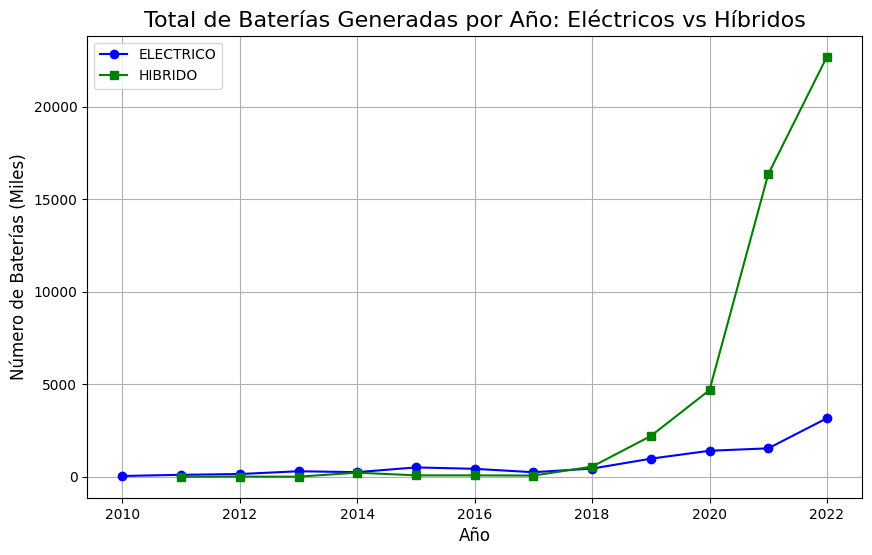

In [ ]:
# Visualización del Total de Baterías generadas por año hasta 2022:

baterias_por_ano_combustible = df1.groupby(['AÑO_REGISTRO', 'COMBUSTIBLE'])['TOTAL_BATERIAS'].sum().unstack()

plt.figure(figsize=(10, 6))
plt.plot(baterias_por_ano_combustible.index, baterias_por_ano_combustible['ELECTRICO'], marker='o', linestyle='-', color='b', label='ELECTRICO')
plt.plot(baterias_por_ano_combustible.index, baterias_por_ano_combustible['HIBRIDO'], marker='s', linestyle='-', color='g', label='HIBRIDO')

plt.title('Total de Baterías Generadas por Año: Eléctricos vs Híbridos', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Baterías (Miles)', fontsize=12)
plt.grid(True)
plt.legend()

plt.show()


## **Analisis de correlacion de Pearson**

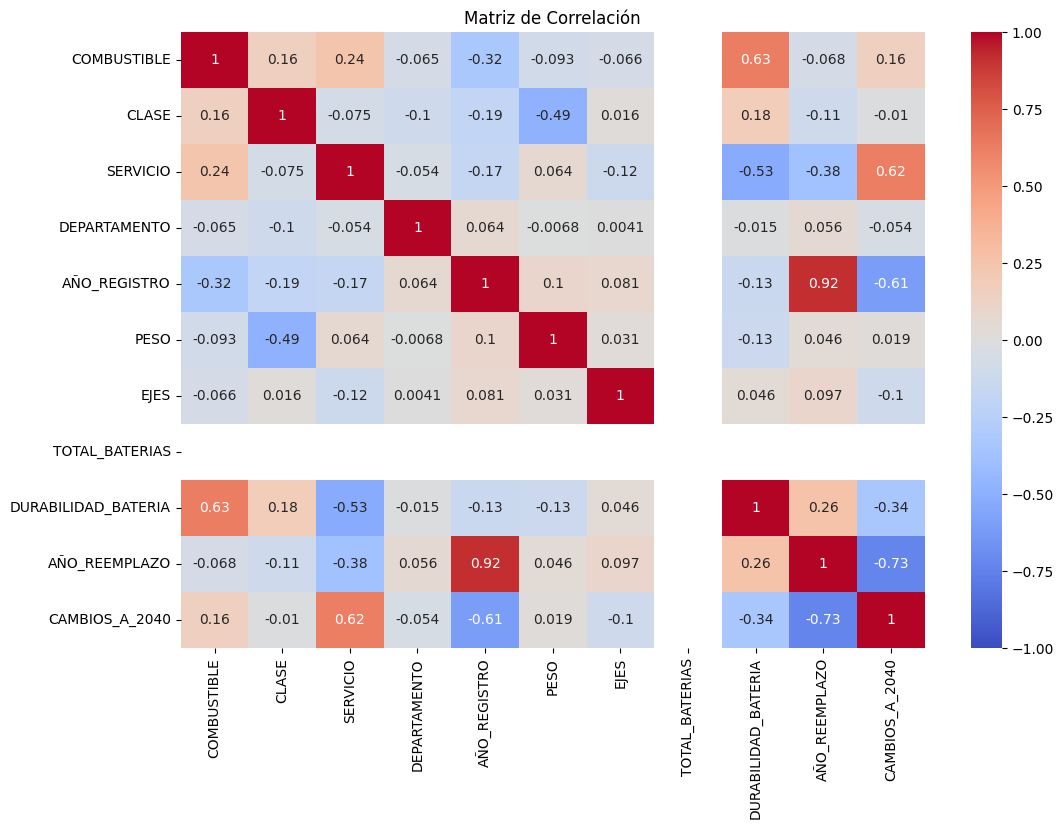

In [ ]:
# Matriz de Correlación de Pearson:

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()


## **Dividimos la Data entre Train y Test:**

In [ ]:
X = df[['COMBUSTIBLE', 'AÑO_REGISTRO', 'SERVICIO']]
y = df['CAMBIOS_A_2040']

# División de los datos en entrenamiento y prueba con 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Paso 3: Entrenamiento de Tres (3) Modelos para Predecir:**

In [ ]:
# Regresión Lineal:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random Forest Regressor:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# XGBoost:
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)
xgbr.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

# Función para evaluar el rendimiento de los modelos:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return r2, mae

# Evaluación de cada modelo:
models = {'Linear Regression': lr, 'Random Forest': rf, 'XGBoost': xgbr}
r2_scores = {}

for name, model in models.items():
    r2, mae = evaluate_model(model, X_test, y_test)
    r2_scores[name] = r2  # Guardar el valor de R² en el diccionario
    print(f"{name} ---> R²: {r2:.4f} ---> MAE: {mae:.4f}")

# Elegir el modelo con el mayor valor de R²:
best_model = max(r2_scores, key=r2_scores.get)
best_r2 = r2_scores[best_model]

print(f"\nEl Modelo con Mejor Rendimiento es: {best_model} con un R² de {best_r2:.4f}.")


Linear Regression ---> R²: 0.6530 ---> MAE: 0.1350
Random Forest ---> R²: 0.9828 ---> MAE: 0.0037
XGBoost ---> R²: 0.9828 ---> MAE: 0.0037

El Modelo con Mejor Rendimiento es: XGBoost con un R² de 0.9828.


In [ ]:
# Guardar el Modelo:

joblib.dump(xgbr, "modelo_xgboost.pkl")
print("Modelo guardado exitosamente.")


Modelo guardado exitosamente.


## **Análisis Temporal**

In [ ]:
df_dese = df[['AÑO_REGISTRO', 'DURABILIDAD_BATERIA', 'TOTAL_BATERIAS']]
df_dese

,AÑO_REGISTRO,DURABILIDAD_BATERIA,TOTAL_BATERIAS
1,2022,8,1
4,2021,9,1
5,2022,8,1
6,2019,9,1
7,2021,8,1
...,...,...,...
56539,2022,7,1
56540,2022,7,1
56541,2022,7,1
56542,2022,7,1


In [ ]:
df_dese = df[['AÑO_REGISTRO', 'DURABILIDAD_BATERIA', 'TOTAL_BATERIAS']]

# Definimos el año límite hasta el cual queremos proyectar los cambios
AÑO_LIMITE = 2040

# Crear un diccionario para contar las baterías desechadas por año
cambios_por_año = {}

# Generar las proyecciones por cada fila (vehículo)
for index, row in df_dese.iterrows():
    año_registro = row['AÑO_REGISTRO']
    durabilidad = row['DURABILIDAD_BATERIA']

    # Calcular el año máximo en que el vehículo y la batería salen de circulación
    año_salida = año_registro + 18

    # Generar los años donde ocurren los cambios hasta el año límite
    año_actual = año_registro + durabilidad
    while año_actual <= AÑO_LIMITE and año_actual <= año_salida:
        if año_actual in cambios_por_año:
            cambios_por_año[año_actual] += 1
        else:
            cambios_por_año[año_actual] = 1
        año_actual += durabilidad


# Convertir el diccionario a DataFrame
df_cambios = pd.DataFrame(list(cambios_por_año.items()), columns=['AÑO', 'Total_Baterías_Fuera_Servicio']).sort_values(by='AÑO')
df_cambios

,AÑO,Total_Baterías_Fuera_Servicio
24,2015,13
21,2016,17
25,2017,1
18,2018,49
23,2019,20
19,2020,46
22,2021,38
20,2022,32
13,2023,182
10,2024,375


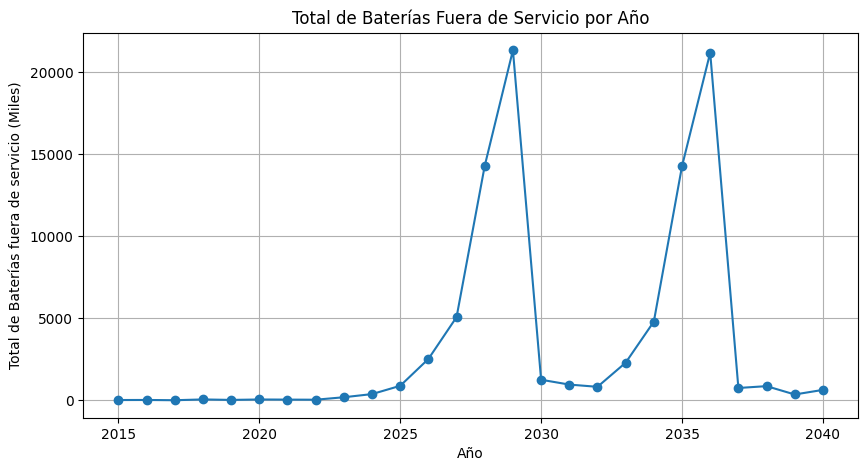

In [ ]:
# Mostrar el DataFrame resultante:

plt.figure(figsize=(10, 5))
plt.plot(df_cambios['AÑO'], df_cambios['Total_Baterías_Fuera_Servicio'], marker='o')
plt.title('Total de Baterías Fuera de Servicio por Año')
plt.xlabel('Año')
plt.ylabel('Total de Baterías fuera de servicio (Miles)')
plt.grid()
plt.show()

In [ ]:
# Crear columna acumulativa:

df_cambios['Acumulado'] = df_cambios['Total_Baterías_Fuera_Servicio'].cumsum()

# Graficar
fig = px.line(df_cambios, x='AÑO', y='Acumulado',
              title='Gráfica Acumulativa de Baterías Fuera de Servicio por Año',
              markers=True)

fig.show()


In [ ]:
df_cambios

,AÑO,Total_Baterías_Fuera_Servicio,Acumulado
24,2015,13,13
21,2016,17,30
25,2017,1,31
18,2018,49,80
23,2019,20,100
19,2020,46,146
22,2021,38,184
20,2022,32,216
13,2023,182,398
10,2024,375,773


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi8rs6_0v/ki39qvpi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi8rs6_0v/n4uc5bgi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44801', 'data', 'file=/tmp/tmpi8rs6_0v/ki39qvpi.json', 'init=/tmp/tmpi8rs6_0v/n4uc5bgi.json', 'output', 'file=/tmp/tmpi8rs6_0v/prophet_model6sj6_l_j/prophet_model-20241019141609.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:16:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:16:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:

Se estima que habrá aproximadamente 89676.75 baterías desechadas en el año 2040.


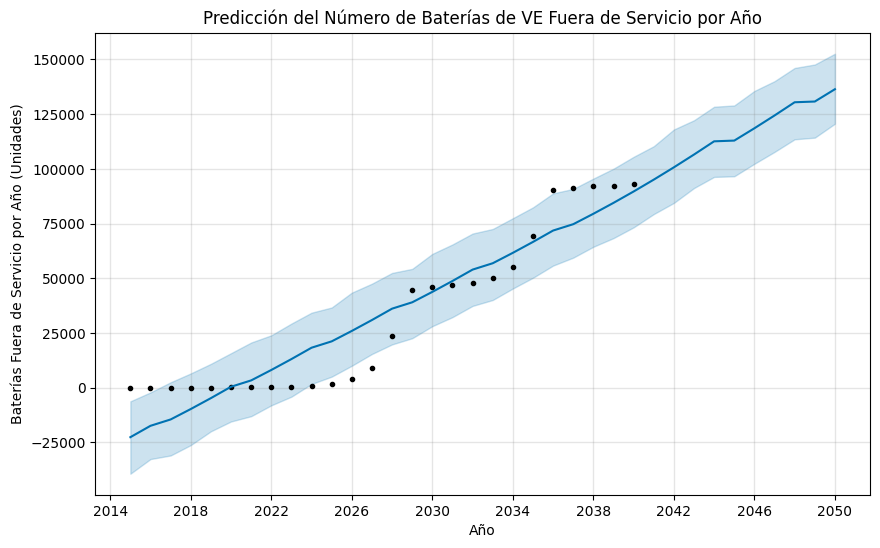

In [ ]:
# Preparar el DataFrame con los nombres que Prophet espera
df_prophet = df_cambios.rename(columns={'AÑO': 'ds', 'Acumulado': 'y'})

# Asegurarnos de que la columna 'ds' sea de tipo datetime
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

# Entrenar el modelo Prophet
modelo_prophet = Prophet(yearly_seasonality=True)
modelo_prophet.fit(df_prophet)

# Generar fechas futuras para los próximos 10 años
periodos_futuros = 10  # Número de años adicionales a predecir
futuro = modelo_prophet.make_future_dataframe(periods=periodos_futuros, freq='Y')

# Realizar la predicción
predicciones = modelo_prophet.predict(futuro)

# Filtrar la predicción específica para 2040
año_a_predecir = 2040
bateria_2029 = predicciones[predicciones['ds'].dt.year == año_a_predecir]['yhat'].values[0]
print(f"Se estima que habrá aproximadamente {bateria_2029:.2f} baterías desechadas en el año {año_a_predecir}.")

# Gráfica de los datos históricos y las predicciones
fig, ax = plt.subplots(figsize=(10, 6))
modelo_prophet.plot(predicciones, ax=ax)

# Personalizar el gráfico
plt.title("Predicción del Número de Baterías de VE Fuera de Servicio por Año")
plt.xlabel("Año")
plt.ylabel("Baterías Fuera de Servicio por Año (Unidades)")
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [ ]:
# Agrupamos por 'AÑO_REEMPLAZO' y sumamos el total de baterías:
df_volumen = df_filtrado.groupby('AÑO_REGISTRO')['TOTAL_BATERIAS'].sum().reset_index()

# Renombramos las columnas 'AÑO_REGISTRO' y 'TOTAL_BATERIAS':
df_volumen.columns = ['Año', 'Total de Vehículos (Unidades)']
df_volumen

,Año,Total de Vehículos (Unidades)
0,2010,20
1,2011,28
2,2012,35
3,2013,51
4,2014,21
5,2015,189
6,2016,224
7,2017,182
8,2018,810
9,2019,2790
